# QUESTION 1

In [1]:
# Import the necessary libraries
import pandas as pd  

In [2]:
# Import the dataset from this address
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

In [3]:
# Assign it to a variable called users
users = pd.read_csv(url, delimiter='|')

In [4]:
headers=['userId','age','gender','occupation','zipcode']
users.columns=headers
users.head()

,userId,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
# Discover what is the mean age per occupation
users.groupby('occupation')[['age']].mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [6]:
# Discover the Male ratio per occupation and sort it from the most to the least
def ratio(x): 
    if x == 'M':
        return 1
    if x == 'F':
        return 0
    
users['gender_type'] = users['gender'].apply(ratio)

jobs = users.groupby('occupation').gender_type.sum() / users.occupation.value_counts() * 100 
jobs.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [7]:
users.groupby('occupation').age.agg(['min', 'max'])  # Step 6 - For each occupation, calculate the minimum and maximum ages

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [8]:
# For each combination of occupation and sex, calculate the mean age

users.groupby(['occupation', 'gender']).age.mean() 



occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [9]:
# For each occupation present the percentage of women and men

male_gender=users[users['gender']=='M']                   
female_gender=users[users['gender']=='F']

male = male_gender.groupby('occupation')[['gender']].count()
female = female_gender.groupby('occupation')[['gender']].count()

all =  users.groupby('occupation')[['gender']].count()
all['male'] = male
all['female'] = female

#To determine their percentage

all['male percentage']=round((all['male']/all['gender'])*100)       
all['female percentage']=round((all['female']/all['gender'])*100)

all[['male percentage','female percentage']]

,male percentage,female percentage
occupation,,
administrator,54.0,46.0
artist,54.0,46.0
doctor,100.0,NaN
educator,73.0,27.0
engineer,97.0,3.0
entertainment,89.0,11.0
executive,91.0,9.0
healthcare,31.0,69.0
homemaker,14.0,86.0


# Question 2

In [10]:
# Import the necessary libraries
import pandas as pd
pd.set_option('display.max_columns', None)
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,NaN,0,10,3,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2.0,1,10,6,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0.0,1,10,5,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1.0,2,29,3,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,76,58,0.0,1,7,5,6,54.6%,36,51,5,6,0,11,11,19


In [11]:
# Team participated in the Euro2012?
euro12.nunique()[0]

16

In [12]:
# The number of columns in the dataset?
euro12.shape[1]

35

In [13]:
# View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [14]:
# Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by = ['Red Cards', 'Yellow Cards'], ascending=[False, False])

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [15]:
# Calculate the mean Yellow Cards given per Team
discipline.groupby('Team')['Yellow Cards'].agg('mean')

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [16]:
# Filter teams that scored more than 6 goals
euro12[['Team']].loc[euro12['Goals'] > 6]

,Team
5,Germany
13,Spain


In [17]:
# Select the teams that start with G
euro12[['Team']].loc[euro12['Team'].str.startswith('G')]

,Team
5,Germany
6,Greece


In [18]:
# Select the first 7 columns
euro12.iloc[:, :7].head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65


In [19]:
# Select all columns except the last 3
euro12.iloc[:,:-3].head(2)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,NaN,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2.0,1,10,6,9,60.1%,53,73,8,7,0


In [20]:
# Present only the Shooting Accuracy from England, Italy and Russia
euro12[['Team','Shooting Accuracy']].loc[euro12['Team'].isin(['England', 'Italy', 'Russia'])]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [21]:
import numpy as np
first = np.random.randint(1,5, size=100)
second = np.random.randint(1,4, size=100)
third = np.random.randint(10000,30001, size=100)
series = np.array([first, second, third])
column_names = ['bedrs', 'bathrs', 'price_sqr_meter']
indexes = np.arange(1,101,1)
dict_ = {'bedrs': first,
         'bathrs': second, 
         'price_sqr_meter': third}


df = pd.DataFrame(data = dict_)



t = pd.concat([pd.Series(first), pd.Series(second), pd.Series(third)])

t


0         3
1         3
2         4
3         4
4         3
      ...  
95    14249
96    17713
97    18042
98    13129
99    14346
Length: 300, dtype: int32

In [22]:
type(t)
t1 = t.reset_index()
t1.drop('index', axis=1)

,0
0,3
1,3
2,4
3,4
4,3
...,...
295,14249
296,17713
297,18042
298,13129


# Question 4

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

In [24]:
data=pd.read_fwf('wind.txt')

In [25]:
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [26]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [27]:
data = data.set_index("Date")
data.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [28]:
data.isnull().values.ravel().sum()

31

In [29]:
data.count().sum()

78857

In [30]:
data.mean()

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [31]:
def stats(stats):
    stats = pd.Series(stats)
    Min = stats.min()
    Max = stats.max()
    Mean = stats.mean()
    Std = stats.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = data.apply(stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [32]:
day_stats = data.apply(stats,axis=1)
day_stats.head()

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [33]:
january_data = data[data.index.month == 1]
january_data.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [34]:
data.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [35]:
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [36]:
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [37]:
first_year = data[data.index.year == 1961]
stats1 = data.resample('W').mean().apply(lambda x: x.describe())
stats1

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,940.000000,940.000000,940.000000,940.000000,939.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,12.365304,10.647725,11.661255,6.309334,10.455607,7.094787,9.801271,8.496123,8.496452,8.710639,13.125912,15.597171
std,3.466600,3.372501,2.840361,2.186432,3.146715,2.556633,3.308180,2.853029,2.638349,2.924546,3.757189,4.468526
min,3.874286,2.452857,4.901429,1.447143,2.775714,1.382857,2.471429,2.284286,2.262857,1.571429,3.661429,5.124286
25%,9.884286,8.277857,9.613929,4.742857,8.248571,5.211071,7.432500,6.470000,6.589286,6.530000,10.346429,12.269286
50%,12.291429,10.486429,11.490000,6.165714,10.254286,6.933571,9.603571,8.358571,8.394286,8.490000,12.846429,15.330714
75%,14.547143,12.757857,13.457143,7.584286,12.627143,8.842500,11.942143,10.457500,10.108571,10.699643,15.513571,18.683929
max,24.010000,23.715714,21.384286,14.517143,22.897143,16.010000,20.474286,17.861429,17.460000,17.932857,26.617143,30.374286


# Question 5

In [38]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [39]:
print(f"Number of Observations {chipo.shape[0]}")
print(f"Number of Columns {chipo.shape[1]}")

Number of Observations 4622
Number of Columns 5


In [40]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [41]:
chipo['item_name'].value_counts().idxmax()  # Which was the most-ordered item?

'Chicken Bowl'

In [42]:
chipo.groupby('item_name')['item_name'].agg('count').sort_values(ascending = False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [43]:
chicken_bowl = chipo.loc[chipo['item_name'] == 'Chicken Bowl'] #step11
chicken_bowl['choice_description'].value_counts().idxmax()      #step12



'[Fresh Tomato Salsa, [Fajita Vegetables, Rice]]'

In [44]:
chipo['order_id'].nunique()

1834

In [45]:
chipo['item_price'].dtype

dtype('O')

In [46]:
chipo['price'] = chipo['item_price'].str.replace('$', '', regex=False)
chipo['price'].dtype

dtype('O')

In [47]:
chipo['price'] = chipo['price'].astype(float)
chipo['price'].dtype

dtype('float64')

In [48]:
chipo['price'].sum()

34500.16

In [49]:
chipo['order_id'].nunique()

1834

In [50]:
order_price = chipo.groupby('order_id')['price'].agg('sum')
order_price.mean()

18.811428571428568

In [51]:
chipo['item_name'].nunique()

50

# Question 6

In [52]:

import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('us-marriages-divorces-1867-2014.csv')
df1.head()



,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [53]:
df1.shape

(145, 6)

In [54]:
df1.dtypes

Year                    int64
Marriages             float64
Divorces              float64
Population              int64
Marriages_per_1000    float64
Divorces_per_1000     float64
dtype: object

In [55]:
df1.Year.max()


2011

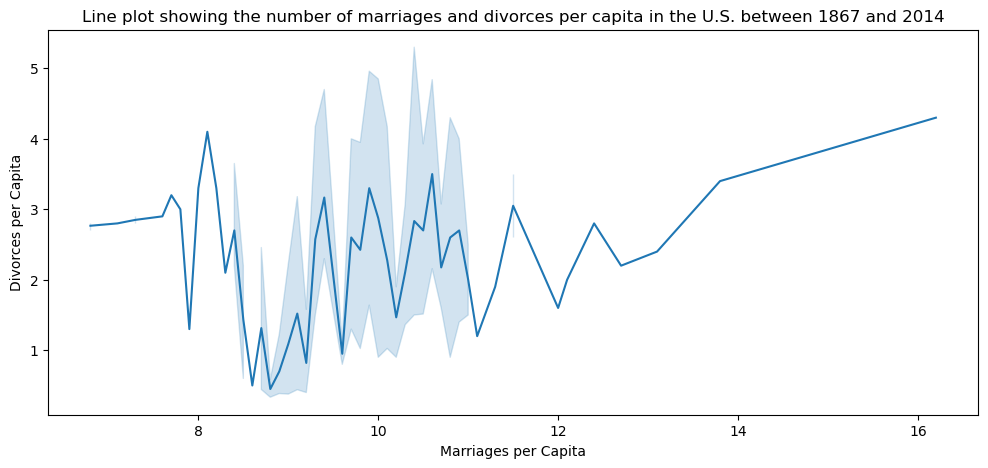

In [56]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Marriages_per_1000', y='Divorces_per_1000', data=df1)
plt.xlabel('Marriages per Capita')
plt.ylabel('Divorces per Capita')
plt.title('Line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014')

plt.show()



# Question 7

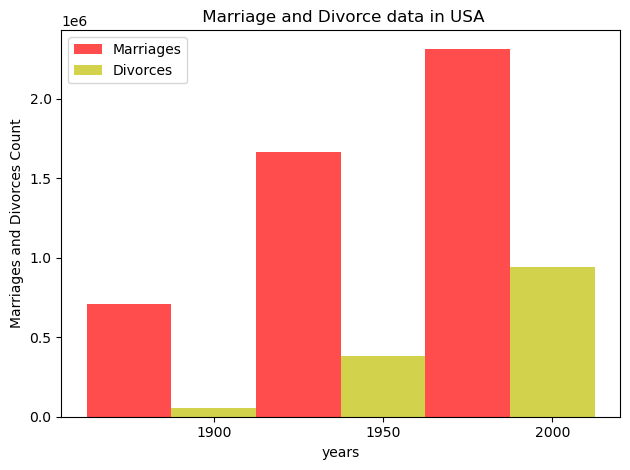

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
divorce_data = divorce_data[
    divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]          # Row selection

years = tuple(divorce_data['Year'].values.tolist())                         # Displaying in tuples

marriages = tuple(divorce_data['Marriages'].values.tolist())
divorces= tuple(divorce_data['Divorces'].values.tolist())

n_groups = 3                                                                # Creating plots

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.7

res1 = plt.bar(index, marriages, bar_width,
alpha=opacity,
color='r',
label='Marriages')

res2 = plt.bar(index + bar_width, divorces, bar_width,
alpha=opacity,
color='y',
label='Divorces')

plt.xlabel('years')
plt.ylabel('Marriages and Divorces Count')
plt.title(' Marriage and Divorce data in USA')
plt.xticks(index + bar_width, (1900, 1950, 2000))
plt.legend()

plt.tight_layout()
plt.show()

# Question 8

In [58]:
import pandas as pd
import seaborn as sns

deadliest_actors = pd.read_csv('actor_kill_counts.csv')

res1 = sns.barplot(x='Count', y='Actor', data=act, order=act.sort_values('Count', ascending=True).Actor)
res1.set_xlabel('Number of kills')
res1.set_ylabel('Actor')
res1.set_title("Deadliest actors in Hollywood", size=12)

NameError: name 'act' is not defined

# Question 9

C:\Users\amitm\AppData\Local\Temp\ipykernel_22544\3888286787.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  romans.groupby(['Emperor']).sum().plot(kind='pie', subplots=True,startangle=180,figsize=(15,10), autopct='%2.2f%%')


Text(0.5, 1.0, 'Roman Emperors assasssinated')

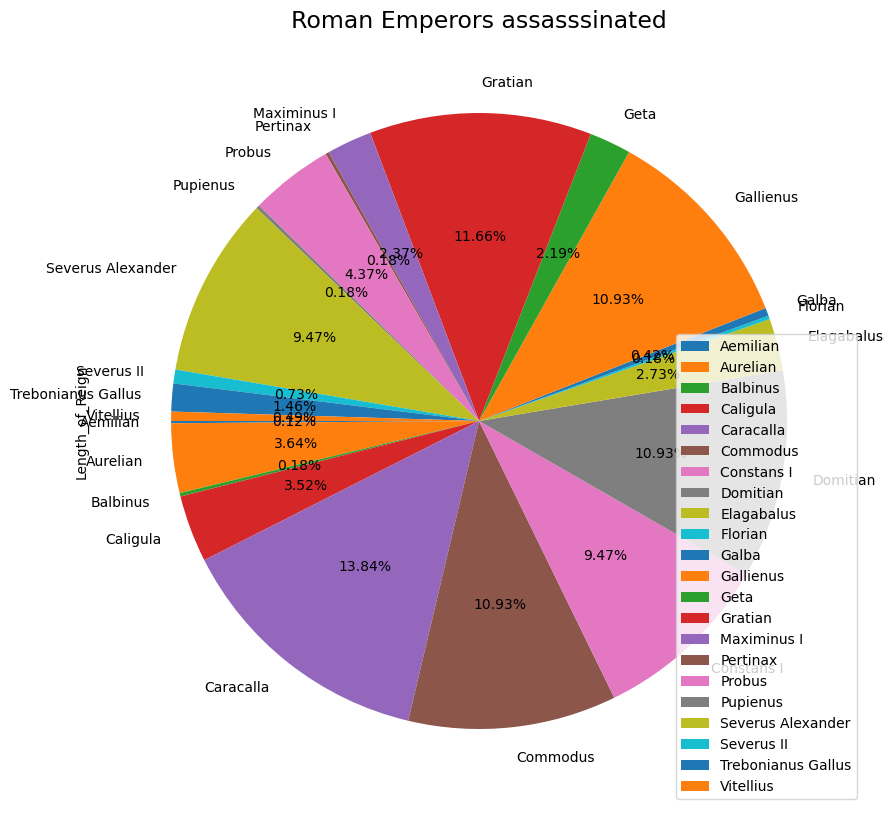

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

roman = pd.read_csv('roman-emperor-reigns.csv')
romans= roman.loc[(roman['Cause_of_Death']=='Assassinated')]

romans
romans.groupby(['Emperor']).sum().plot(kind='pie', subplots=True,startangle=180,figsize=(15,10), autopct='%2.2f%%')
plt.title("Roman Emperors assasssinated", fontsize=17)

# Question 10

Text(0.5, 1.0, 'Relationship between the total revenue earned and the number of Computer Science PhDs awarded in the U.S.')

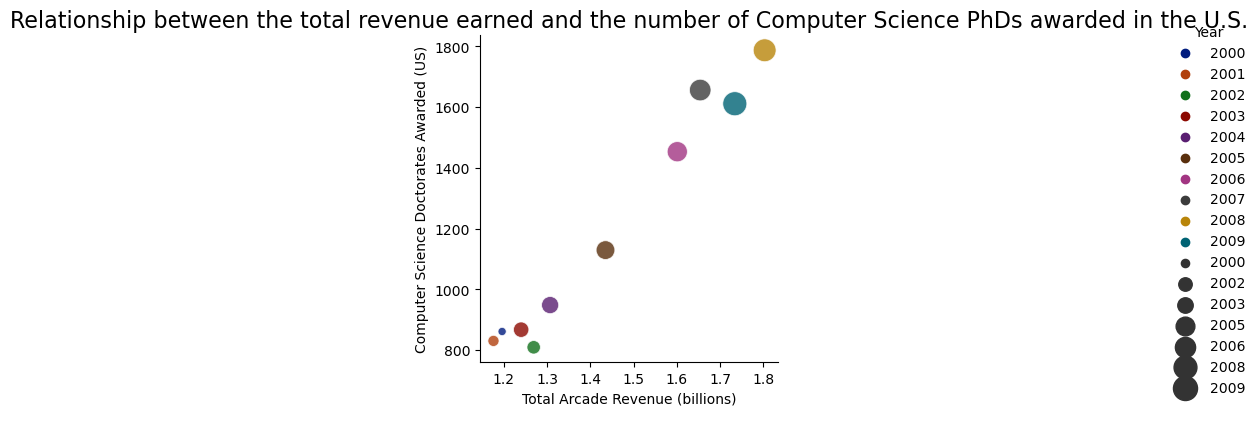

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

arcade=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

arcade_rev= arcade.loc[(arcade['Year']>=2000)&(arcade['Year']<=2009)]

seaborn= sns.relplot(x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)", hue="Year", size="Year",
            sizes=(35, 300), alpha=.8, palette="dark",
            height=4, data=arcade)
plt.title("Relationship between the total revenue earned and the number of Computer Science PhDs awarded in the U.S.", fontsize=16)